## Numpy

In [ ]:
import numpy as np

### Zadanie 1.

Stwórz losową tablicę 10,000 liczb, następnie do każdego elementu dodaj 1. Następnie napisz dokładnie tę samą funkcję używając `numpy` i jego tablic. Porównaj czas działania swoich rozwiązań.

In [6]:
import random
import time

def add_one_standard(list_size):
    random_list = [random.random() for _ in range(list_size)]
    return [x + 1 for x in random_list]

def add_one_numpy(list_size):
    random_list = np.random.rand(list_size)
    return random_list + 1

list_size = 1000000


start_time = time.time()    
add_one_standard(list_size)
standard_time = time.time() - start_time


start_time = time.time()
add_one_numpy(list_size)
numpy_time = time.time() - start_time

print(("Standard", standard_time, "Numpy" , numpy_time))

('Standard', 0.1865675449371338, 'Numpy', 0.011557579040527344)


### Zadanie 2.

Napisz funkcje obliczajaca $\sin(x) + \cos(x)$ dla kazdego elementu tablicy 10,000 losowych liczb używając pętli oraz używając numpy, porownaj ich szybkość podobnie jak w poprzednim zadaniu.

In [7]:
from math import sin, cos

def calculate_standard(list_size):
    random_list = [random.random() for _ in range(list_size)]
    return [sin(x) + cos(x) for x in random_list]

def calculate_numpy(list_size):
    random_array = np.random.rand(list_size)
    return np.sin(random_array) + np.cos(random_array)


list_size = 10000


start_time = time.time()
calculate_standard(list_size)
standard_time = time.time() - start_time

start_time = time.time()
calculate_numpy(list_size)
numpy_time = time.time() - start_time


print(("Standard", standard_time, "Numpy" , numpy_time))

('Standard', 0.002998828887939453, 'Numpy', 0.0010013580322265625)


### Zadanie 3.

Napisz wydajniejszą forme następujących funkcji. Dopisz do każdej test potwierdzający szybkość zaproponowanego rozwiązania.

In [8]:
def cube_sum(x):
    """Zwraca sume szescianow elementow"""
    result = 0
    for i in range(len(x)):
        result += x[i] ** 3
    return result

def almost_variance(x):
    """Oblicza 1/n * SUM (x_i - mean(x))^4"""
    m = sum(x) / len(x)
    result = 0
    for i in range(len(x)):
        result += (x[i] - m) ** 4
    result /= len(x)
    return result


def cube_sum_np(x):
    return np.sum(np.power(x, 3))

def almost_variance_np(x):
    m = np.mean(x)
    return np.mean((x - m) ** 4)



import timeit

x = np.random.rand(10000)

original_cube_time = timeit.timeit('cube_sum(x)', globals=globals(), number=100)

numpy_cube_time = timeit.timeit('cube_sum_np(x)', globals=globals(), number=100)

original_variance_time = timeit.timeit('almost_variance(x)', globals=globals(), number=100)

numpy_variance_time = timeit.timeit('almost_variance_np(x)', globals=globals(), number=100)

print(f"Original cube_sum time: {original_cube_time}")
print(f"NumPy cube_sum time: {numpy_cube_time}")
print(f"Original almost_variance time: {original_variance_time}")
print(f"NumPy almost_variance time: {numpy_variance_time}")

Original cube_sum time: 0.3014170999995258
NumPy cube_sum time: 0.032012299999223615
Original almost_variance time: 0.3888895000000048
NumPy almost_variance time: 0.038968199999544595


### Zadanie 4.

Wykorzystujac `broadcasting` (patrz na rysunek poniżej) stwórz tabliczkę mnożenia tzn. tablice $A$ taka, ze $$A_{ij} = i \cdot j\;\;\;\;\; \forall i,j \in \{1,\dots,10\}$$

Czy potrafisz wykonać to jednym poleceniem, nie używajac przy tym petli/comprehensions?

<img src="http://www.astroml.org/_images/fig_broadcast_visual_1.png">

In [9]:
matrix_A = np.arange(1, 11).reshape(-1, 1) * np.arange(1, 11)

print(matrix_A)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]


### Zad 5.

Wygeneruj losową tablice `10 x 5`, która będzie reprezentować `10` punktów w `5` wymiarowej przestrzeni. Napisz funkcje, która policzy odleglość euklidesową pomiędzy każdą parą punktów, czy potrafisz zrobić to **bez użycia żadnych pętli/comprehensions**? 

Przypomnienie, dla dwóch wektorów: $x$ i $y$ $$d_{e}(x,y) = \| x - y \|^2_2 = \sum_{i=1}^d (x_i - y_i)^2 $$

In [10]:
points = np.random.rand(10, 5)

distances = np.sqrt(np.sum((points[:, np.newaxis, :] - points[np.newaxis, :, :]) ** 2, axis=-1))

print(distances)



[[0.         0.91257757 1.13651993 1.05796763 1.11874158 1.33194551
  0.71731106 0.47929374 1.105937   0.59602611]
 [0.91257757 0.         0.90493704 0.9345352  0.73129015 1.07231702
  0.56049021 1.10158571 0.74021012 1.02343514]
 [1.13651993 0.90493704 0.         0.92119659 1.03568419 1.31663402
  1.14169176 1.27864281 0.6465547  1.36547624]
 [1.05796763 0.9345352  0.92119659 0.         0.91759029 1.01215061
  0.94357666 1.30015856 0.61007933 0.81752055]
 [1.11874158 0.73129015 1.03568419 0.91759029 0.         1.56405542
  1.00802011 1.41017747 1.10137478 1.14819646]
 [1.33194551 1.07231702 1.31663402 1.01215061 1.56405542 0.
  0.84436169 1.28040927 0.78706202 1.17505767]
 [0.71731106 0.56049021 1.14169176 0.94357666 1.00802011 0.84436169
  0.         0.73773407 0.89010243 0.75504067]
 [0.47929374 1.10158571 1.27864281 1.30015856 1.41017747 1.28040927
  0.73773407 0.         1.2621748  0.88332782]
 [1.105937   0.74021012 0.6465547  0.61007933 1.10137478 0.78706202
  0.89010243 1.26217

### Zad 6.

Napisz funkcje do "wybielania" zbioru punktow, tj. aplikowania następującej transformacji (ponownie, zrób to bez użycia pętli etc.)
$$
\mathrm{white}(X)_{ij} = \frac{X_{ij} - \mu_j}{\sigma_j}
$$
gdzie $\mu_j$ to srednia po $j$ej kolumnie, a $\sigma_j$ to odchylenie standardowe po tej kolumnie, np.

$$
\mathrm{white}\left ( \left [ \begin{matrix} 
0& 1\\
2& 3\\
4& 5\\
6& 7\\
8& 9
\end{matrix} \right ] \right ) = 
\left [ \begin{matrix} 
-1.41421356& -1.41421356\\
-0.70710678& -0.70710678\\
0.        &  0.        \\
0.70710678&  0.70710678\\
1.41421356&  1.41421356
\end{matrix} \right ]
$$

W szczególności średnia po poszczególnych kolumnach nowej macierzy powinna wynosić `0` a odchylenie standardowe `1`.

In [11]:
def whiten(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)

    return (X - mu) / sigma

X = np.arange(10).reshape(5, 2)

whitened_X = whiten(X)

whitened_X

array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]])

### Zad 7.

Majac dana tablice dowolnie wymiarowa (dla uproszczenia mozesz przyjac ze jedno lub dwu) oraz liczbe `x` znajdz najblizsza wartosc `x` w `A`, tzn. 

$$
\mathrm{closest}(x, A) = \arg\min_{a\in A}| x - a| 
$$

np. 

$$
\mathrm{closest}(1.5, [1, -4, 3]) = 1
$$

Ponownie, czy potrafisz zrobic to bez petli, etc.?


In [14]:
def closest(x, A):
    A = np.asarray(A) 
    closest_element = A.flat[np.abs(A - x).argmin()]
    return closest_element

closest_value = closest(1.5, [1, -4, 3])
print(closest_value)

1


### Zad 8.

Zaimplementuj proste liczenie wartosci wielomianu o zadanych wspolczynnikach (analogie `np.poly1d`), czyli funkcje

$$
\mathrm{poly}(x, a) = a_0 + a_1 x + a_2 x^2 + \dots + a_k x^k = \sum_{i=1}^k a_i x^i
$$

Czy potrafisz zrobic to jednolinijkowo bez uzycia petli, etc. (oraz oczywiście `np.poly1d`). 
Może Ci się przydać metoda `cumprod`.

In [15]:
import numpy as np


poly = lambda x, a: np.dot(a, np.power(x, np.arange(len(a))))


poly_value = poly(2, [1, 2, 3])
print(poly_value)

17


## Obrazki

Do wyświetlania obrazków w notebooku potrzebny będzie `matplotlib`. W PyCharmie można użyć `imshow` z biblioteki `scipy`.

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

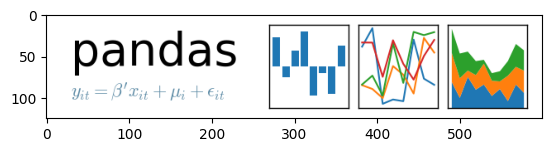

In [26]:
img = mpimg.imread('images/pandas_logo.png')
plt.imshow(img)

### Zad 9.

Napisz funckje do przetwarzania obrazu do skali szarości wg wzoru:

$$ 0.2126 \times R + 0.7152 \times  G + 0.0722 \times B $$

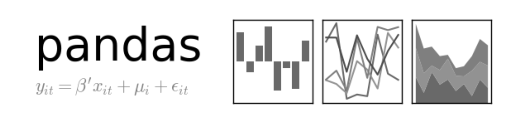

In [24]:
def convert_to_grayscale(image_path):

    img = mpimg.imread(image_path)
    
    
    gray_img = np.dot(img[...,:3], [0.2126, 0.7152, 0.0722])
    

    if gray_img.ndim == 3 and gray_img.shape[2] == 3:
        gray_img = gray_img.mean(axis=2)
    
    return gray_img

image_path = 'images/pandas_logo.png'

gray_image = convert_to_grayscale(image_path)

plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

### Zadanie 10.

Wyłącznie za pomocą metod numpy napisz kod do interpolacji liniowej pomiędzy parą punktów (dowolnej wymiarowości) wg wzoru:

$$ x_i = \lambda x_1 + (1 - \lambda) x_2$$

Kod powinien od razu generować interpolacje dla wielu wartości $\lambda$, np dla 10 różnych $\lambda \in \{0, 0.1, 0.2, \dots, 1\}$

In [25]:
import numpy as np


def linear_interpolation(x1, x2, lambdas):
    return np.outer(1 - lambdas, x1) + np.outer(lambdas, x2)

x1 = np.array([1, 2])
x2 = np.array([3, 4])
lambdas = np.linspace(0, 1, 11) 


interpolated_values = linear_interpolation(x1, x2, lambdas)
print(interpolated_values)

[[1.  2. ]
 [1.2 2.2]
 [1.4 2.4]
 [1.6 2.6]
 [1.8 2.8]
 [2.  3. ]
 [2.2 3.2]
 [2.4 3.4]
 [2.6 3.6]
 [2.8 3.8]
 [3.  4. ]]
